# 1. Loading im.db as pd.df

In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('data/im.db')
cursor = conn.cursor()

In [3]:
movie_basics_imdb = pd.read_sql('''
SELECT *
FROM movie_basics
''', conn)

movie_akas_imdb = pd.read_sql('''
SELECT *
FROM movie_akas
''', conn)

movie_rat_imdb = pd.read_sql('''
SELECT *
FROM movie_ratings
''', conn)

principals_imdb = pd.read_sql('''
SELECT *
FROM principals
''', conn)

known_4_imdb = pd.read_sql('''
SELECT *
FROM known_for
''', conn)

directors_imdb = pd.read_sql('''
SELECT *
FROM directors
''', conn)

writers_imdb = pd.read_sql('''
SELECT *
FROM writers
''', conn)

persons_imdb = pd.read_sql('''
SELECT *
FROM persons
''', conn)

# 2. Name of df Variables:

### imdb Variables (each variable is an individual table):
- persons_imdb
- principals_imdb
- known_4_imdb
- directors_imdb
- writers_imdb
- movie_basics_imdb
- movie_rat_imdb
- movie_akas_imdb

# 3. Exploring IMDB df's:

### 3a. Exploring: movie_akas_imdb

In [4]:
#movie_akas_imdb.info()

In [5]:
#movie_akas_imdb['ordering'].value_counts().tail(20)

In [6]:
#movie_akas_imdb["movie_id"].value_counts()

#### ordering = 1 has the same length as indivitual movie_id's be the same length as unique movie_id

In [7]:
#movie_akas_imdb['region'].value_counts()

In [8]:
m_akas_us = pd.read_sql('''
SELECT *
FROM movie_akas
WHERE region = 'US' 
GROUP BY movie_id
''', conn)
m_akas_us.shape

(47433, 8)

In [9]:
#m_akas_us['movie_id'].value_counts()

In [10]:
len(m_akas_us['movie_id'].unique())

47433

In [11]:
#m_akas_us.loc[m_akas_us['movie_id'] == 'tt2488496']

### 3b. Exploring: movie_akas_imdb

In [12]:
#movie_basics_imdb.info()

In [13]:
#movie_basics_imdb['movie_id'].value_counts()

In [14]:
m_basics = pd.read_sql('''
SELECT *
FROM movie_basics
WHERE length(movie_id) = 9
''', conn)
#m_basics

In [15]:
akas_basics_merge = m_akas_us.merge(m_basics, on='movie_id',
                                        how='inner')
#akas_basics_merge.info()

### 3c. Explored: movie_rat_imdb

In [16]:
#movie_rat_imdb.info()

 # 3d. Combining IMDB database

In [34]:
imdb_merged = akas_basics_merge.merge(movie_rat_imdb, on='movie_id',
                                       how='left')
#imdb_merged

In [35]:
#imdb_merged.info()

In [36]:
imdb_merged.drop(['language', 'attributes', 'types'], axis=1, inplace=True)

In [20]:
#imdb_merged.info()

# 4. Loading tn.movie_budgets as pd.df

In [21]:
tn_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')

In [22]:
#going to need this after I get movie id list onto budget list
"""
SELECT customerName, state, country
FROM 
WHERE country != 'USA' AND customerName LIKE '%collect%'
"""

"\nSELECT customerName, state, country\nFROM \nWHERE country != 'USA' AND customerName LIKE '%collect%'\n"

# 6. Exploring tn_budgets

In [23]:
tn_budgets.drop_duplicates(subset = ['movie'], inplace=True)

In [24]:
tn_budgets.rename(columns = {'movie':'primary_title'}, inplace=True)

In [25]:
tn_budgets['primary_title'].value_counts()

Wes Craven Presents: They    1
Pulse                        1
Tombstone                    1
Braveheart                   1
Cold Pursuit                 1
                            ..
Skin Trade                   1
Just Like Heaven             1
My Baby's Daddy              1
Bad Company                  1
Slacker                      1
Name: primary_title, Length: 5698, dtype: int64

# 7: MERGE Merging Budgets to IMDB

#### follow link: https://www.geeksforgeeks.org/how-to-convert-pandas-dataframe-into-sql-in-python/

In [26]:
imdb_df_copy = imdb_merged.copy()

In [27]:
imdb_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47378 entries, 0 to 47377
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           47378 non-null  object 
 1   ordering           47378 non-null  int64  
 2   title              47378 non-null  object 
 3   region             47378 non-null  object 
 4   is_original_title  47373 non-null  float64
 5   primary_title      47378 non-null  object 
 6   original_title     47377 non-null  object 
 7   start_year         47378 non-null  int64  
 8   runtime_minutes    39642 non-null  float64
 9   genres             46788 non-null  object 
 10  averagerating      26637 non-null  float64
 11  numvotes           26637 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 4.7+ MB


In [28]:
#imdb_db = pd.merge_ordered(imdb_df_copy, tn_budgets, on='primary_title')
#imdb_db.drop_duplicates(subset='primary_title', inplace=True)

In [29]:
imdb_db = imdb_df_copy.merge(tn_budgets, how='inner', on='primary_title')

In [30]:
imdb_db

,movie_id,ordering,title,region,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,2,Foodfight!,US,0.0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0293429,5,Mortal Kombat: Devastation,US,0.0,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",NaN,NaN,10,"Aug 18, 1995","$20,000,000","$70,433,227","$122,133,227"
2,tt0326592,1,"A Bellman, a Hooker, and a Rabbi...",US,0.0,The Overnight,The Overnight,2010,88.0,None,7.5,24.0,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt3844362,6,The Overnight,US,0.0,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828.0,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
4,tt0359950,25,The Secret Life of Walter Mitty,US,0.0,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,tt8575408,4,Hide and Seek,US,0.0,Hide and Seek,Amur senza fin,2018,91.0,Comedy,6.6,31.0,96,"Jan 28, 2005","$25,000,000","$51,100,486","$123,696,741"
2139,tt8632862,6,Fahrenheit 11/9,US,0.0,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018","$5,000,000","$6,352,306","$6,653,715"
2140,tt8663516,8,Child's Play,US,0.0,Child's Play,Child's Play,2019,120.0,Horror,NaN,NaN,77,"Nov 9, 1988","$9,000,000","$33,244,684","$44,196,684"
2141,tt9024106,3,Unplanned,US,0.0,Unplanned,Unplanned,2019,106.0,"Biography,Drama",6.3,5945.0,33,"Mar 29, 2019","$6,000,000","$18,107,621","$18,107,621"


# Sorted by Genre

In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# same as 
# from matplotlib import pyplot as plt

import seaborn as sns

from scipy import stats
from sklearn.datasets import load_iris

In [32]:
imdb_db['worldwide_gross'] = imdb_db['worldwide_gross'].str.replace('$','').str.replace(',','').astype(float)
imdb_db['production_budget'] = imdb_db['production_budget'].str.replace('$','').str.replace(',','').astype(float)
imdb_db['domestic_gross'] = imdb_db['domestic_gross'].str.replace('$','').str.replace(',','').astype(float)

imdb_db['profit'] = imdb_db['worldwide_gross'] - imdb_db['production_budget']

In [33]:
imdb_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2142
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2143 non-null   object 
 1   ordering           2143 non-null   int64  
 2   title              2143 non-null   object 
 3   region             2143 non-null   object 
 4   is_original_title  2143 non-null   float64
 5   primary_title      2143 non-null   object 
 6   original_title     2143 non-null   object 
 7   start_year         2143 non-null   int64  
 8   runtime_minutes    1999 non-null   float64
 9   genres             2136 non-null   object 
 10  averagerating      1857 non-null   float64
 11  numvotes           1857 non-null   float64
 12  id                 2143 non-null   int64  
 13  release_date       2143 non-null   object 
 14  production_budget  2143 non-null   float64
 15  domestic_gross     2143 non-null   float64
 16  worldwide_gross    2143 

In [18]:
imdb_db['genres'].dropna(inplace=True)

In [19]:
imdb_db['profit'].dropna(inplace=True)

In [20]:
genre_profit = imdb_db.loc[:,['genres','profit']]

In [21]:
genre_profit.dropna(axis = 0, inplace=True)

In [29]:
gen_pro = genre_profit.sort_values('profit', ascending=False).head(30)

In [33]:
#gen_pro

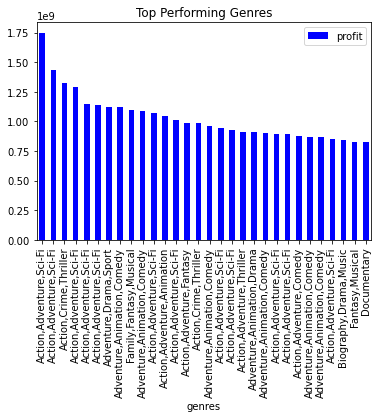

In [32]:
gen_pro.plot(kind = 'bar',
        x = 'genres',
        y = 'profit',
        color = 'blue')
  
# set the title
plt.title('Top Performing Genres')
  
# show the plot
plt.show()

# EXTRA CREDIT STUFF (ORDERING BY CAST)

In [51]:
#movie_akas_imdb.loc[movie_akas_imdb['ordering'] == 1]

In [10]:
ordering_df = movie_akas_imdb.loc[movie_akas_imdb['ordering'] == 1]

In [52]:
#ordering_df.info()

In [53]:
#principals_imdb['category']

In [ ]:
principals_imdb = pd.read_sql(''' SELECT * FROM principals ''', conn) principals_imdb.loc[principals_imdb['movie_id'] == 'tt0323808']

In [ ]:
# Ordering = IMDB Top Cast order

I figured it out! It's the order that the 'top cast' shows up on the IMDB page. 

I'm going to stash this for after I make a visualization for Genre. 
Going to see if the 'top cast' 

search google for id = 'tt0323808'

https://www.imdb.com/title/tt0323808/fullcredits?ref_=tt_cl_sm
    
principals_imdb = pd.read_sql('''
SELECT *
FROM principals
''', conn)
principals_imdb.loc[principals_imdb['movie_id'] == 'tt0323808']

In [44]:
imdb_order =pd.read_sql('''
SELECT *, sum(ordering)
FROM principals
WHERE ordering <= 
GROUP BY movie_id
ORDER BY sum(ordering) desc
''', conn)
imdb_order

,movie_id,ordering,person_id,category,job,characters,sum(ordering)
0,tt9916754,10,nm9275317,cinematographer,None,None,55
1,tt9916706,10,nm1432957,actor,None,None,55
2,tt9916622,10,nm9272492,cinematographer,None,None,55
3,tt9916538,10,nm4700236,composer,music director,None,55
4,tt9914828,10,nm10537598,writer,english adaptation,None,55
...,...,...,...,...,...,...,...
143449,tt10007268,1,nm10541649,director,None,None,1
143450,tt10006874,1,nm10211155,director,None,None,1
143451,tt10003990,1,nm9033305,director,None,None,1
143452,tt0187902,1,nm0156955,actor,None,"[""Wong Fei Hung""]",1


In [54]:
#principals_imdb.loc[principals_imdb['ordering'] == 10]

In [55]:
#principals_imdb.loc[principals_imdb['movie_id'] == 'tt0323808']

In [56]:
#principals_imdb['movie_id'].value_counts()